<a href="https://colab.research.google.com/github/hedgeworth9/twitter-event-detection/blob/topic-modelling/Gensim_LDA_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji==1.7.0
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install transformers
    !pip install sentencepiece
    !pip install bert-extractive-summarizer
    !pip install --upgrade tqdm
    !pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=3c7143c89e0ffa59ef6f18ba5ae3cd9e5d30c9c5e14c1c92c1c5f66ad908c2d6
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, h

# Imports

In [ ]:
!npm install stopwords-tl

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ stopwords-tl@0.1.0
added 1 package from 1 contributor and audited 1 package in 1.47s
found 0 vulnerabilities



In [ ]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
import json
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS

import anvil.server

anvil.server.connect("server_VQ7IE2Y7GVFCMNJ22FXNEX6S-L6ALIWHB7JHCL2XH")

# Opening JSON file
f = open('node_modules/stopwords-tl/stopwords-tl.json')
tlStopwords = json.loads(f.read())
stopwords = set(STOPWORDS)

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [ ]:
stopwords.update(tlStopwords)
stopwords.update(['na', 'sa', 'ko', 'ako', 'ng', 'mga', 'ba', 'ka', 'yung', 'lang', 'di', 'mo', 'kasi'])
stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'akin',
 'aking',
 'ako',
 'alin',
 'all',
 'also',
 'am',
 'amin',
 'aming',
 'an',
 'and',
 'ang',
 'ano',
 'anumang',
 'any',
 'apat',
 'are',
 "aren't",
 'as',
 'at',
 'atin',
 'ating',
 'ay',
 'ba',
 'bababa',
 'bago',
 'bakit',
 'bawat',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bilang',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'dahil',
 'dalawa',
 'dapat',
 'di',
 'did',
 "didn't",
 'din',
 'dito',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'doon',
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'gagawin',
 'gayunman',
 'get',
 'ginagawa',
 'ginawa',
 'ginawang',
 'gumawa',
 'gusto',
 'habang',
 'had',
 "hadn't",
 'hanggang',
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'hindi',
 'his',

# Dataframe Processing

In [ ]:
dataset = 'katip-december.csv'

df = pd.read_csv(dataset)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608974076722442241,1608974076722442241,2022-12-30 23:51:27 UTC,2022-12-30,23:51:27,0,2422333867,jeamanuelle,jenel 🌸,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608972570652725250,1608972570652725250,2022-12-30 23:45:28 UTC,2022-12-30,23:45:28,0,962013634493755392,drunkinnaz,Mahsun KIRMIZIGÜL,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1608972278129385472,1608972278129385472,2022-12-30 23:44:19 UTC,2022-12-30,23:44:19,0,1392328349607989251,teorisibilgi,Bilgi Teorisi,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608956640971350017,1608956639251693569,2022-12-30 22:42:10 UTC,2022-12-30,22:42:10,0,1200867780914012160,fikretkaplan99,Fikret Kaplan,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608954460071690240,1608934270151831552,2022-12-30 22:33:30 UTC,2022-12-30,22:33:30,0,1486480624085090307,varolussalsabir,Kağan🇹🇷,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'demarkesports', 'name': 'De ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641,1601569782016659456,1601294943519375360,2022-12-10 13:29:26 UTC,2022-12-10,13:29:26,0,412330565,bernaasnck,Bernaa,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kartalhayri', 'name': 'karta...",NaN,NaN,NaN,NaN
5642,1601569544421912578,1601510943955259394,2022-12-10 13:28:29 UTC,2022-12-10,13:28:29,0,1412323610111381506,saadeekufte,Tuu’ba,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bbayaannmimikk', 'name': 'ev...",NaN,NaN,NaN,NaN
5643,1601564297616044032,1601475024321654785,2022-12-10 13:07:38 UTC,2022-12-10,13:07:38,0,1149086777556328449,sametuykn,Samet,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sporx', 'name': 'Sporx', 'id...",NaN,NaN,NaN,NaN
5644,1601563050267799552,1601488138567753728,2022-12-10 13:02:41 UTC,2022-12-10,13:02:41,0,943555485034254336,sevilay89982776,Sevilay,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KarayollariGM', 'name': 'Kar...",NaN,NaN,NaN,NaN


In [ ]:
df.rename(columns = {'tweet':'original_tweets'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df.apply(lambda row: row[df['language'].isin(['en'])])
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
88,1608844959154831362,1608844959154831362,2022-12-30 15:18:23 UTC,2022-12-30,15:18:23,0,1067248458736652289,midsomewhere,nothing nowhere one at a time,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
90,1608841383829450757,1608502780905283585,2022-12-30 15:04:11 UTC,2022-12-30,15:04:11,0,1545065244216594432,katip_31,Iśan Pudzianowski 🇵🇱,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'rushildaglii', 'name': 'Rush...",NaN,NaN,NaN,NaN
136,1608734112789180417,1608160857124491269,2022-12-30 07:57:55 UTC,2022-12-30,07:57:55,0,1545065244216594432,katip_31,Iśan Pudzianowski 🇵🇱,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Kloudsaga', 'name': 'KloudSa...",NaN,NaN,NaN,NaN
152,1608703293190189056,1608703293190189056,2022-12-30 05:55:28 UTC,2022-12-30,05:55:28,0,2809246982,pancitkenton,kentaro,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
156,1608690480329416705,1608690480329416705,2022-12-30 05:04:33 UTC,2022-12-30,05:04:33,0,706323972,sugijoshi,Suresh Joshi,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5608,1601617090540376065,1601617090540376065,2022-12-10 16:37:25 UTC,2022-12-10,16:37:25,0,29961033,lmquien,ʟᴇᴇ🐈‍⬛,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5611,1601611486455267328,1601611486455267328,2022-12-10 16:15:09 UTC,2022-12-10,16:15:09,0,4454770334,adieisagoodboy,adie,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5620,1601604972042678272,1601604972042678272,2022-12-10 15:49:16 UTC,2022-12-10,15:49:16,0,487903898,renuelfallore,ren,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5632,1601582616183918592,1601552961745788929,2022-12-10 14:20:26 UTC,2022-12-10,14:20:26,0,842770373913563136,mejnuni1,Seyyah Cihan,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'katip_31', 'name': 'Iśan Pud...",NaN,NaN,NaN,NaN


In [ ]:
df.reset_index(inplace=True)

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,88,1608844959154831362,1608844959154831362,2022-12-30 15:18:23 UTC,2022-12-30,15:18:23,0,1067248458736652289,midsomewhere,nothing nowhere one at a time,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,90,1608841383829450757,1608502780905283585,2022-12-30 15:04:11 UTC,2022-12-30,15:04:11,0,1545065244216594432,katip_31,Iśan Pudzianowski 🇵🇱,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'rushildaglii', 'name': 'Rush...",NaN,NaN,NaN,NaN
2,136,1608734112789180417,1608160857124491269,2022-12-30 07:57:55 UTC,2022-12-30,07:57:55,0,1545065244216594432,katip_31,Iśan Pudzianowski 🇵🇱,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Kloudsaga', 'name': 'KloudSa...",NaN,NaN,NaN,NaN
3,152,1608703293190189056,1608703293190189056,2022-12-30 05:55:28 UTC,2022-12-30,05:55:28,0,2809246982,pancitkenton,kentaro,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,156,1608690480329416705,1608690480329416705,2022-12-30 05:04:33 UTC,2022-12-30,05:04:33,0,706323972,sugijoshi,Suresh Joshi,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,5608,1601617090540376065,1601617090540376065,2022-12-10 16:37:25 UTC,2022-12-10,16:37:25,0,29961033,lmquien,ʟᴇᴇ🐈‍⬛,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
325,5611,1601611486455267328,1601611486455267328,2022-12-10 16:15:09 UTC,2022-12-10,16:15:09,0,4454770334,adieisagoodboy,adie,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
326,5620,1601604972042678272,1601604972042678272,2022-12-10 15:49:16 UTC,2022-12-10,15:49:16,0,487903898,renuelfallore,ren,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
327,5632,1601582616183918592,1601552961745788929,2022-12-10 14:20:26 UTC,2022-12-10,14:20:26,0,842770373913563136,mejnuni1,Seyyah Cihan,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'katip_31', 'name': 'Iśan Pud...",NaN,NaN,NaN,NaN


In [ ]:
def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.EMOJI_DATA]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    return text

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
df['emoji_free_tweets'] = df['original_tweets'].apply(call_emoji_free)

#Create a new column with url free tweets
df['url_free_tweets'] = df['emoji_free_tweets'].apply(url_free_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load spacy
# Make sure to restart the runtime after running installations and libraries tab
nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']


# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []
STOP_WORDS.update(stopwords)

for doc in tokenizer.pipe(df['url_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
df['tokens'] = tokens


STOP_WORDS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'\n',
 '\n\n',
 ' ',
 '$',
 '&',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '-',
 '.',
 '@',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'akin',
 'aking',
 'ako',
 'alin',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amin',
 'aming',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'ang',
 'ano',
 'another',
 'anumang',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apat',
 'are',
 "aren't",
 'around',
 'as',
 'at',
 'atin',
 'ating',
 'ay',
 'ba',
 'bababa',
 'back',
 'bago',
 'bakit',
 'bawat',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bilang',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'dahil',
 'dalawa',
 'dapat',
 'di',
 'did',
 "didn't",
 'din',
 'dito',
 'do',
 '

In [ ]:
# Make tokens a string again
df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['tokens_back_to_text'].apply(get_lemmas)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Make lemmas a string again
df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in df['lemmas']]

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    # tokens = re.sub('@*!*$*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
df['lemma_tokens'] = df['lemmas_back_to_text'].apply(tokenize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:19: DeprecationWarning: invalid escape sequence '\w'
<>:19: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-13-0214d658a4f1>:19: DeprecationWarning: invalid escape sequence '\w'
  tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers


# LDA Base Model Setup

In [ ]:
# Create a id2word dictionary
id2word = Dictionary(df['lemma_tokens'])
print(len(id2word))

1208


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))

857


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            chunksize=200,
                                            passes=10,
                                            per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.112*"katip" + 0.017*"pop" + 0.014*"go" + 0.013*"u" + 0.010*"omg" + '
  '0.009*"miss" + 0.009*"traffic" + 0.008*"friend" + 0.008*"place" + '
  '0.008*"take"'),
 (1,
  '0.082*"katip" + 0.026*"battle" + 0.023*"game" + 0.018*"ateneo" + 0.014*"vs" '
  '+ 0.013*"ticket" + 0.011*"final" + 0.011*"uaap" + 0.010*"grab" + '
  '0.010*"upd"'),
 (2,
  '0.068*"katip" + 0.013*"feel" + 0.012*"pls" + 0.011*"today" + 0.011*"good" + '
  '0.009*"taft" + 0.009*"flow" + 0.008*"look" + 0.008*"lrt" + 0.008*"ph"'),
 (3,
  '0.052*"katip" + 0.039*"@" + 0.016*"pop" + 0.011*"bike" + 0.009*"ids" + '
  '0.009*"nasa" + 0.009*"ur" + 0.009*"let" + 0.009*"christmas" + 0.009*"lane"'),
 (4,
  '0.062*"katip" + 0.013*"cool" + 0.011*"home" + 0.011*"condo" + 0.010*"see" + '
  '0.009*"time" + 0.009*"lf" + 0.009*"blue" + 0.009*"u" + 0.008*"fuck"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['lemma_tokens'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4926322420533249


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            num_topics=num_topics,
                                            random_state=100,
                                            chunksize=200,
                                            passes=10,
                                            per_word_topics=True,
                                            id2word=id2word)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus,
                                                        texts=df['lemma_tokens'],
                                                        start=2,
                                                        limit=10,
                                                        step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


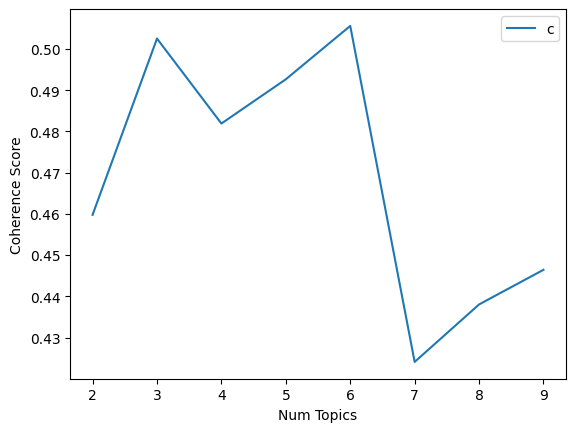

In [ ]:
limit = 10; start = 2; step = 1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.4597708548969358,
 0.5025086963327928,
 0.48190821622547086,
 0.4926322420533249,
 0.5055752582492906,
 0.42410119060776424,
 0.4380406250771677,
 0.4464384352904195]

In [ ]:
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, "has Coherence Value of", round(cv, 4))

Num Topics = 2 has Coherence Value of 0.4598
Num Topics = 3 has Coherence Value of 0.5025
Num Topics = 4 has Coherence Value of 0.4819
Num Topics = 5 has Coherence Value of 0.4926
Num Topics = 6 has Coherence Value of 0.5056
Num Topics = 7 has Coherence Value of 0.4241
Num Topics = 8 has Coherence Value of 0.438
Num Topics = 9 has Coherence Value of 0.4464


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
k_max = max(coherence_values)
num_topics = coherence_values.index(k_max) + 2

num_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6

# Updating Base Model # of Topics

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            random_state=100,
                                            chunksize=200,
                                            passes=10,
                                            per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.117*"katip" + 0.017*"u" + 0.012*"go" + 0.010*"omg" + 0.009*"miss" + '
  '0.009*"come" + 0.009*"take" + 0.009*"friend" + 0.008*"pop" + '
  '0.008*"traffic"'),
 (1,
  '0.080*"katip" + 0.031*"game" + 0.020*"ticket" + 0.016*"battle" + '
  '0.014*"final" + 0.014*"uaap" + 0.012*"ateneo" + 0.012*"basketball" + '
  '0.012*"call" + 0.011*"ub"'),
 (2,
  '0.091*"katip" + 0.035*"battle" + 0.016*"today" + 0.015*"ateneo" + '
  '0.015*"feel" + 0.014*"vs" + 0.012*"look" + 0.012*"championship" + '
  '0.012*"taft" + 0.008*"@jonasgahrstore"'),
 (3,
  '0.049*"katip" + 0.043*"@" + 0.016*"think" + 0.015*"traffic" + 0.014*"pop" + '
  '0.013*"grabe" + 0.012*"bike" + 0.012*"ur" + 0.011*"day" + 0.011*"give"'),
 (4,
  '0.076*"katip" + 0.023*"place" + 0.017*"pop" + 0.014*"condo" + 0.012*"see" + '
  '0.012*"guy" + 0.011*"tell" + 0.011*"time" + 0.011*"lf" + 0.011*"new"'),
 (5,
  '0.057*"katip" + 0.018*"pls" + 0.014*"home" + 0.011*"pop" + 0.010*"try" + '
  '0.008*"çelebi" + 0.008*"present" + 0.008*"watch" 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Optimized Model Hyperparameter Optimization

In [ ]:
def compute_coherence_values2(corpus, dictionary, k, a, b):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              chunksize=200,
                                              passes=10,
                                              alpha=a,
                                              eta=b,
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=df['lemma_tokens'], dictionary=id2word, coherence='c_v')

  return coherence_model_lda.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}

# min_topics = 1
# max_topics = 10
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

alpha = [0.05, 0.1, 0.5, 1, 5, 10]
# alpha.append('symmetric')
# alpha.append('asymmetric')

beta = [0.05, 0.1, 0.5, 1, 5, 10]
# beta.append('symmetric')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                 }
if 1 == 1:
  pbar = tqdm.tqdm(total=540)

  for i in range(len(corpus_sets)):
    for a in alpha:
      for b in beta:
        cv = compute_coherence_values2(corpus=corpus_sets[i], dictionary=id2word, k=num_topics, a=a, b=b)
        model_results['Validation_Set'].append(corpus_title[i])
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(cv)

        pbar.update(1)
  pd.DataFrame(model_results).to_csv('lda_tuning_results_new.csv', index=False)
  pbar.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
 13%|█▎        | 72/540 [01:26<09:23,  1.20s/it]


# Hyperparameter Selection

In [ ]:
params_df = pd.read_csv('lda_tuning_results_new.csv')
params_df = params_df[params_df.Validation_Set == '100% Corpus']
params_df.reset_index(inplace=True)

params_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,Validation_Set,Alpha,Beta,Coherence
0,36,100% Corpus,0.05,0.05,0.503865
1,37,100% Corpus,0.05,0.10,0.492728
2,38,100% Corpus,0.05,0.50,0.501684
3,39,100% Corpus,0.05,1.00,0.495267
4,40,100% Corpus,0.05,5.00,0.427820
5,41,100% Corpus,0.05,10.00,0.451045
6,42,100% Corpus,0.10,0.05,0.491891
7,43,100% Corpus,0.10,0.10,0.493712
8,44,100% Corpus,0.10,0.50,0.500058
9,45,100% Corpus,0.10,1.00,0.490907


In [ ]:
max_params = params_df.loc[params_df['Coherence'].idxmax()]
max_coherence = max_params['Coherence']
max_alpha = max_params['Alpha']
max_beta = max_params['Beta']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.5424309001827355, 10.0, 0.05)

In [ ]:
lda_model_final = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=7,
                                                  random_state=100,
                                                  chunksize=200,
                                                  passes=10,
                                                  alpha=max_alpha,
                                                  eta=max_beta,
                                                  per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=df['lemma_tokens'], dictionary=id2word,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5874720486349176


In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_final, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.260333  0.076364       1        1  14.639229
3      0.079277  0.113421       2        1  14.357137
1      0.042718  0.140165       3        1  14.326689
2     -0.016099 -0.116304       4        1  14.281429
0      0.028986 -0.107001       5        1  14.190998
4     -0.009320 -0.142289       6        1  14.164197
6      0.134771  0.035644       7        1  14.040320, topic_info=       Term       Freq      Total Category  logprob  loglift
66   çelebi   8.000000   8.000000  Default  30.0000  30.0000
639   place  14.000000  14.000000  Default  29.0000  29.0000
672    come  10.000000  10.000000  Default  28.0000  28.0000
316      lf   9.000000   9.000000  Default  27.0000  27.0000
570    walk   7.000000   7.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
28        @   6.425154  27.046121   Topic7  -4.2199   0.5259
401     omg   4.125546  14.001276   Topic7  -4.6629   0.7413
314    area   3.419523   9.893890   Topic7  -4.8506   0.9008
234     man   3.309490   8.511483   Topic7  -4.8833   1.0186
760  battle   3.395873  26.269413   Topic7  -4.8575  -0.0826

[400 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
530       3  0.904078       .
793       4  0.738639      //
28        2  0.184869       @
28        3  0.110922       @
28        4  0.147896       @
...     ...       ...     ...
94        2  0.326317     yes
94        7  0.652635     yes
384       2  0.924337     yon
714       5  0.766720     ytb
66        1  0.893955  çelebi

[554 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 3, 1, 5, 7])

In [ ]:
pprint(lda_model_final.print_topics())

[(0,
  '0.133*"katip" + 0.022*"place" + 0.015*"u" + 0.014*"night" + 0.014*"dm" + '
  '0.013*"friend" + 0.013*"look" + 0.012*"evet" + 0.012*"monday" + '
  '0.012*"hahaha"'),
 (1,
  '0.090*"katip" + 0.017*"come" + 0.015*"ateneo" + 0.014*"miss" + 0.013*"hope" '
  '+ 0.013*"pls" + 0.013*"try" + 0.011*"boy" + 0.011*"sure" + 0.011*"area"'),
 (2,
  '0.112*"katip" + 0.015*"lf" + 0.014*"give" + 0.013*"amp" + 0.012*"battle" + '
  '0.012*"grabe" + 0.011*"manila" + 0.011*"christmas" + 0.010*"meetup" + '
  '0.010*"u"'),
 (3,
  '0.075*"katip" + 0.016*"day" + 0.015*"pop" + 0.014*"go" + 0.013*"traffic" + '
  '0.013*"bike" + 0.013*"watch" + 0.012*"admu" + 0.012*"find" + 0.011*"know"'),
 (4,
  '0.100*"katip" + 0.020*"battle" + 0.015*"@" + 0.015*"cool" + 0.013*"ure" + '
  '0.013*"condo" + 0.013*"time" + 0.013*"upd" + 0.012*"blue" + 0.012*"miss"'),
 (5,
  '0.080*"katip" + 0.020*"home" + 0.018*"çelebi" + 0.015*"thing" + '
  '0.013*"thank" + 0.013*"present" + 0.012*"university" + 0.011*"need" + '
  '0.010*"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Topic Assignment

In [ ]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

lda_topics = lda_model_final.show_topics(num_words=10)

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    print(topic)
    topics.append(preprocess_string(topic[1], filters))

print(topics)

(0, '0.133*"katip" + 0.022*"place" + 0.015*"u" + 0.014*"night" + 0.014*"dm" + 0.013*"friend" + 0.013*"look" + 0.012*"evet" + 0.012*"monday" + 0.012*"hahaha"')
(1, '0.090*"katip" + 0.017*"come" + 0.015*"ateneo" + 0.014*"miss" + 0.013*"hope" + 0.013*"pls" + 0.013*"try" + 0.011*"boy" + 0.011*"sure" + 0.011*"area"')
(2, '0.112*"katip" + 0.015*"lf" + 0.014*"give" + 0.013*"amp" + 0.012*"battle" + 0.012*"grabe" + 0.011*"manila" + 0.011*"christmas" + 0.010*"meetup" + 0.010*"u"')
(3, '0.075*"katip" + 0.016*"day" + 0.015*"pop" + 0.014*"go" + 0.013*"traffic" + 0.013*"bike" + 0.013*"watch" + 0.012*"admu" + 0.012*"find" + 0.011*"know"')
(4, '0.100*"katip" + 0.020*"battle" + 0.015*"@" + 0.015*"cool" + 0.013*"ure" + 0.013*"condo" + 0.013*"time" + 0.013*"upd" + 0.012*"blue" + 0.012*"miss"')
(5, '0.080*"katip" + 0.020*"home" + 0.018*"çelebi" + 0.015*"thing" + 0.013*"thank" + 0.013*"present" + 0.012*"university" + 0.011*"need" + 0.010*"wanna" + 0.010*"life"')
(6, '0.129*"katip" + 0.029*"game" + 0.019*"a

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for text in range(len(df['original_tweets'])):
  print(lda_model_final[corpus][text])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([(0, 0.10634625), (1, 0.17348379), (2, 0.1581046), (3, 0.18091562), (4, 0.14591679), (5, 0.11861408), (6, 0.11661888)], [(0, [5]), (1, [2]), (2, [1, 6, 0, 2, 4, 3]), (3, [3]), (4, [2]), (5, [3, 4]), (6, [1]), (7, [3]), (8, [2]), (9, [1]), (10, [2, 6]), (11, [1]), (12, [2, 1, 6, 4, 0, 3, 5]), (13, [3]), (14, [4]), (15, [1, 3]), (16, [1]), (17, [1]), (18, [4]), (19, [6]), (20, [3, 2, 4, 0, 6, 5]), (21, [3]), (22, [3]), (23, [5, 3]), (24, [4, 2, 0]), (25, [2]), (26, [3, 1]), (27, [1])], [(0, [(5, 0.99952394)]), (1, [(2, 0.9996574)]), (2, [(0, 0.11456289), (1, 0.36768052), (2, 0.10779651), (3, 0.04786184), (4, 0.05945289), (6, 0.30259168)]), (3, [(3, 0.99969655)]), (4, [(2, 0.9996576)]), (5, [(3, 0.633733), (4, 0.36577597)]), (6, [(1, 0.99967426)]), (7, [(3, 0.9996974)]), (8, [(2, 0.9996573)]), (9, [(1, 0.9996572)]), (10, [(2, 0.9554243), (6, 0.034865472)]), (11, [(1, 0.9996747)]), (12, [(0, 0.14014457), (1, 0.15691704), (2, 0.17781547), (3, 0.13575089), (4, 0.14618935), (5, 0.094316885),

In [ ]:
df['topic'] = [sorted(lda_model_final[corpus][text][0]) for text in range(len(df['original_tweets']))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from operator import itemgetter
def assignTopic(l):
  maxTopic = max(l,key=itemgetter(1))[0]
  return maxTopic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df[df['topic'].map(lambda d: len(d)) > 0]
df['topic'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.1063462),
 (1, 0.17348391),
 (2, 0.15810435),
 (3, 0.1809155),
 (4, 0.14591706),
 (5, 0.118614085),
 (6, 0.11661889)]

In [ ]:
df['max_topic'] = df['topic'].map(lambda row: assignTopic(row))

df['max_topic']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      3
1      2
2      4
3      3
4      5
      ..
324    0
325    4
326    3
327    0
328    0
Name: max_topic, Length: 329, dtype: int64

In [ ]:
df['max_topic'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


max_topic
0    66
6    54
4    45
3    44
1    44
5    43
2    33
Name: count, dtype: int64

In [ ]:
topic_clusters = []
for i in range(num_topics):
  topic_clusters.append(df[df['max_topic'].isin(([i]))])
  topic_clusters[i] = topic_clusters[i]['original_tweets'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Representative Tweets per Topic

In [ ]:
def get_topic_value(row, i):
  if len(row) == 1:
    return row[0][1]
  else:
    return row[i][1]

for i in range(len(topic_clusters)):
  tweets = df.loc[df['max_topic'] == i]
  tweets['topic'] = tweets['topic'].apply(lambda x: get_topic_value(x, i))
  # tweets['topic'] = [row[i][1] for row in tweets['topic']]
  tweets_sorted = tweets.sort_values('topic', ascending=False)
  tweets_sorted.drop_duplicates(subset=['original_tweets'])
  rep_tweets = tweets_sorted['original_tweets']
  rep_tweets = [*set(rep_tweets)]
  print('Topic ', i)
  print(rep_tweets[:5])

Topic  0
['@ermenisimsar @elmuglevi Onlykels?', 'we just got acquainted last night and parang andami na nating pinagdaanan chz hang soon since we’re both in katip anyway 😋', 'KATIP ITS BEEN A WHILE', 'Anyone studying out tonight in katip? Need some accountability buddies,,,,at least\U0001fae4', 'Never leave Katip 2 hours before your flight. Super traffic pa sa EDSA 💀']
Topic  1
["i'm so glad i didn't entertain you that night at katip 😵\u200d💫", '@IllanaNorthstar ok ok HAHAHA also its called katip nowadays!! katips is an older term', 'wts lfb harry styles ph   〰️ 2 early entry premium standing tickets for Love on Tour Bulacan 〰️ 17,750 each (same price)  〰️ meet ups in katip   price nego if getting until the 22nd pls get it na pls \U0001f979', "i hope zav gets healthy coming into game 3. i hope everyone from both teams are healthy coming into game 3. 🙏🏽  we want to see both sides of katip in full force, that's what the players and the fans deserve. Game 3's about to be a treat, y'all! 👀

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-55-68dfbdb96909>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['topic'] = tweets['topic'].apply(lambda x: get_topic_value(x, i))
<ipython-input-55-68dfbdb96909>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
# topic_1 = df[df['max_topic'].isin(([0]))]
# topic_1 = topic_1['lemma_tokens'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# compiled = [[x for inlist in topic_1 for x in inlist]]
# compiled = compiled.pop(0)
# topic_1 = compiled
# topic_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_clusters[0]

# for i in range(len(topic_clusters)):
#   compiled = [[x for inlist in topic_clusters[i] for x in inlist]]
#   compiled = compiled.pop(0)
#   topic_clusters[i] = compiled
#   print(compiled)
# compiled = [[x for inlist in topic_0 for x in inlist]]
# compiled = compiled.pop(0)
# compiled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['cant have shit in katip',
 'not regis being open air 💀 all that katip smoke im dead',
 'I’m having a nostalgic stroll down Katip going Ah yes and i’ve cried on That street corner, and that corner, and in This bar, in front of That bank, and Th',
 "@Xiventale OOH around UPTC/katip minsan, but i can't remember kung may recent time!!! AAA i will, hopefully it's not a doppelganger or anything 😅",
 '@mellisreviews Keeper for sure',
 'hi, DM stans! im looking for moots!! 💗  a few thingz abt meh: 20 yrs old, bi, college student in katip, super daldal 🥲  my dm bets are REYSTER!! (ult), vinci, jeromy, marcus, drei, and asi BOOM WASAK 🌩️  #DreamMaker #DreamMaker_REYSTER #DreamMaker_VINCI #DreamMaker_JEROMY',
 '@hjgmilf Part of Kanto Conyo AU:  Pansy and Neville are the barkada mom and dad. Pansy has her own condo in Katip where everyone crashes after getting wasted.',
 'Gh0rl, ba’t ang traffic sa katip wtf',
 'we just got acquainted last night and parang andami na nating pinagdaanan chz hang s

# Topic Summarization

In [ ]:
#T5

from transformers import T5Tokenizer, T5ForConditionalGeneration

model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')
for i in range(len(topic_clusters)):  
  text = " ".join(topic_clusters[i])
  TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
  text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
  Preprocessed_text = "summarize: " + text
  tokens_input = tokenizer.encode(Preprocessed_text,return_tensors="pt", max_length=512, truncation=True)
  summary_ids = model.generate(tokens_input,
                                min_length=60,
                                max_length=180,
                              length_penalty=4.0)

  summary = tokenizer.decode(summary_ids[0])
  print("Topic " + str(i) + summary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:9: DeprecationWarning: invalid escape sequence '\S'
<>:9: DeprecationWarning: invalid escape sequence '\S'
<ipython-input-59-68950288b863>:9: DeprecationWarning: invalid escape sequence '\S'
  TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Topic 0<pad> dm stans is a 20 yrs old bi college student in katip. she has her own condo where everyone crashes after getting wasted. pansy has her own condo in katip where everyone crashes after getting wasted. she has a vendetta against people who didn t go to katip.</s>
Topic 1<pad> katip is an older term grindr katip is boring controversial opinion. katip is a battle of gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt gt</s>
Topic 2<pad> maxwinebach me1kator lvrdsean is a ceo of kings of katip lfg champs rushildaglii. he says he needs to go to katip every sunday so we can walwalwal again. he also says he is not willing to spend hundreds on one. he also says he needs to go to katip every sunday so we can walwal again.</s>
Topic 3<pad> katip ave is owned by a university. pop up popup is for katip only marr s alleged tg scam. marr s fortuner crashes into nj s bike while exiting popup. pop up is for katip only marr s alleged tg scam gcash exchange for

In [ ]:
# # BART

# from transformers import T5Tokenizer, T5ForConditionalGeneration

# model = T5ForConditionalGeneration.from_pretrained('t5-base')
# tokenizer = T5Tokenizer.from_pretrained('t5-base')
# text = " ".join(topic_0)
# TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
# text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
# Preprocessed_text = "summarize: " + text
# tokens_input = tokenizer.encode(Preprocessed_text,return_tensors="pt", max_length=512, truncation=True)
# summary_ids = model.generate(tokens_input,
#                               min_length=60,
#                               max_length=180,
#                               length_penalty=4.0)

# summary = tokenizer.decode(summary_ids[0])
# print(summary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# BART (not pretrained)

# from transformers import BartForConditionalGeneration, AutoTokenizer
# model_ckpt = "sshleifer/distilbart-cnn-6-6"
# tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# model = BartForConditionalGeneration.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# GPT-2

from summarizer import TransformerSummarizer
import re

GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")

for i in range(len(topic_clusters)):
  text = " ".join(topic_clusters[i])
  summerize = ''.join(GPT2_model(text, min_length=3, max_length=180))
  print("Topic " + str(i) + " " + summerize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 0 AAA i will, hopefully it's not a doppelganger or anything 😅 @mellisreviews Keeper for sure hi, DM stans! im looking for moots!! Pansy has her own condo in Katip where everyone crashes after getting wasted. büyükbebek take over. UP Town? Wru @manch318 Perhaps I shall try next time I bring my dog to the vet (which happens to be in front of Tetsuo Katip) KATIP ITS BEEN A WHILE @katip_31 Evet 📍 Blackbox Katip


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 1 Prior to going home, we passed by CP Garcia (IMath + Engg), saw the Lantern Parade fireworks display, and passed by KNL &amp; Maginhawa (parang Katip 2.0 🥲). Full circle moment 😭 Sobrang second nature yung maghanap ng ways to go to UP through different transportation. Traffic ba when I ride the fx from Taft to Philcoa? i'm so glad i didn't entertain you that night at katip 😵‍💫 @IllanaNorthstar ok ok HAHAHA also its called katip nowadays!! Basta may bonfire sa katip!! DM if interested!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 2 @rushildaglii @MaxWinebach @me1kator @lvrdsean You should start seeing a doctor then. well pupunta akong katip ngayon pero no acad things anymore! what if we ano we put bike lanes over the tables at pop up katip during paskuhan?


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 3 very unexpected yon JDKKS lets hang out pagbalik ko!! @JustinLim03 Wtf 400 pesos before from intra to katip na 💀 Filo college socmed au where sj’s fortuner crashes into nj’s bike while exiting popup katip. Sj complains abt bikelanes while nj calls sj a burgis nepo baby.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 4 @Kloudsaga @MicrosoftLearn Thanks but I have John Savill from YouTube Is this Katip fashion 😭😭😭😂 who’s here? # 🏆 @miyakendoit where in katip?
Topic 5 I tried sorting them out kanina but I ended up watching Emily. But now I wanna go to katip. see you around katip! i super enjoy our lunch/dinner dates at katip n ill miss that during my 1 month break at dvo ! Mag-f2f ADHD ululan na tayo soon pls!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# XLNet
from summarizer import TransformerSummarizer
import re

xlnet_model = TransformerSummarizer(transformer_type="XLNet",transformer_model_key="xlnet-base-cased")

for i in range(len(topic_clusters)):
  text = " ".join(topic_clusters[i])
  summerize = ''.join(xlnet_model(text, min_length=60, max_length=120))
  print("Topic " + str(i) + " " + summerize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 0 AAA i will, hopefully it's not a doppelganger or anything 😅 @mellisreviews Keeper for sure hi, DM stans! Pansy has her own condo in Katip where everyone crashes after getting wasted. jgh at tagaytay aaa i miss katip already @KvnxlstrM @benzpangan Sa Katip ba ‘to?


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 1 Mafi then took me to Philcoa where I would ride the fx back to Ermita. Full circle moment 😭 Sobrang second nature yung maghanap ng ways to go to UP through different transportation.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 2 @rushildaglii @MaxWinebach @me1kator @lvrdsean You should start seeing a doctor then. what if we ano we put bike lanes over the tables at pop up katip during paskuhan?


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 3 Sj complains abt bikelanes while nj calls sj a burgis nepo baby. Both are otw to the up vs admu basketball game damn take a chill pill 😮‍💨 the pop up thing was a joke???


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 4 @Kloudsaga @MicrosoftLearn Thanks but I have John Savill from YouTube Is this Katip fashion 😭😭😭😂 who’s here? # haven't seen u since the pandemic kain naman tayo minsan sa katip!!!
Topic 5 I tried sorting them out kanina but I ended up watching Emily. A lot of my principles go back to all the things you taught me. drove around katip last night w/o eil pls its so fun no one is nagging me when i make mistakes.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# MBART-50

from transformers import MBartForConditionalGeneration, MBartTokenizer

def summarize_text(text):
    model_name = 'facebook/mbart-large-50'
    tokenizer = MBartTokenizer.from_pretrained(model_name)
    model = MBartForConditionalGeneration.from_pretrained(model_name)

    inputs = tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)

    return summary

# Example usage
for i in range(len(topic_clusters)):
  text_to_summarize = "Enter your text to be summarized here."
  text_list = " ".join(topic_clusters[i])
  summary = summarize_text(text_list)
  print("Topic " + str(i) + " " + summary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


Topic 0 have shit in katip not regis being open air 💀 all that katip smoke im dead I’m having a nostalgic stroll down Katip going Ah yes and i’ve cried on That street corner, and that corner, and in This bar, in front of That bank, and Th @Xiventale OOH around UPTC/katip minsan, but i can't remember kung may recent time!!! AAA i will, hopefully it's not a doppelganger or anything 😅 @mellisreviews Keeper for sure hi, DM stans! im looking for moots!! 💗 a few thingz abt meh: 20 yrs old, bi, college student


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


Topic 1 called this the katip boy style 😭😭 even had my brother on a chokehold @moonlitemnl this one is in uptown center katip 😂 @roannehestia I have a lot of good memories of katip nights and it's always w you EMMY starbucks' iced shaken hibiscus tea with pomegranate pearls reminds me of katip kinda sad na our weekly katip tradition is gon b halted till feb )); i really enjoyed those sunday midnights,,,, its always giving wkw WHDAHJS the urge to miss the katip stop everytime i ride the lrt so i


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


Topic 2 So if you guys want to know what to do next, here's the best part of it: if you want to know what to do next, here's the best part of it: if you guys want to know what to do next, here's the best part of it: if you guys want to know what to do next, here's the best part of it: if you guys want to know what to do next, here's the best part of it: if you guys want to know what to do next, here's the best part of it: if you guys want to know what to do next: here's the best part of it: if you guys want to know what


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


Topic 3 that i think about it here's a thread of what university vibe your favorite opm artists are giving the ransom collective - dlsu/csb ben&amp;ben - feu munimuni - upm/upd any name's okay - benilde ivos/unique - (p)up lola amour - ust she's only sixteen - upd/ateneo (very katip) no traffic in katip never thought i'd see the day!  @upblissed Active job appliers On the 5th day of Christmas, Twitter gave to us: Inka’s Bike Lane Pop Up is for Katip only Marr’s alleged


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


Topic 4 This is your sign to transfer to the souther side of katip 🤪 took me 8 hrs to get home to olongapo from katip public transpo in this country is fucked RODIC'S DINER EXPANDING ALL THE WAY TO THE OTHER SIDE OF KATIP FUCK YES may branch na sila sa labas ng village 😭🏻 @yejiseungscart is this around katip ba? LF: One Bedroom Condo (Manda, Commonwealth, Eastwood, Capitol Hills/Katip Area) OR TownHouse, QCOOL COOL COOL LMK WHE EVER URE IN ALL THE WAY TO THE OUTSIDE


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Topic 5 Cancelled Katip invite bc I wanted to clean my room—haven’t really opened all the Christmas presents and they’re just everywhere. I tried sorting them out kanina but I ended up watching Emily. But now I wanna go to katip. Again, hindi ako sure kanino dapat mainis 😖 HI if we def confessed to each other we wldve been a thing and idk how that wldve been BUT thank u for introducing the bass to me def very memorable we shld hang out in katip in the future /p but im awkward as hale.. but ig we can be awkwardtgt???!


In [ ]:
# def textrank(corpus, ratio=0.2):    
#   if type(corpus) is str:        
#     corpus = [corpus]    
#   lst_summaries = [gensim.summarization.summarize(txt,  
#                      ratio=ratio) for txt in corpus]    
#   return lst_summaries

# ## Apply the function to corpus
# predicted = textrank(corpus=topic_0, ratio=0.2)
# predicted[i]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
anvil.server.wait_forever()